__Анализ связей между признаками в наборе данных заболеваемости печени__

Структура блокнота:

0. Предварительная обработка данных
1. Анализ связей между признаками


# 0. Предварительная обработка данных

__Вывод первых 10 записей датасета__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = '../liver.csv'
df = pd.read_csv(dataset_path)

df.head(10)

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208.0,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154.0,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202.0,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202.0,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290.0,53,58,6.8,3.4,1.00,1


__Предварительная оценка данных__

Датасет заболеваемости печени состоит из 587 записей и 11 колонок.

По таблице ниже можно сказать, что столбцы TotalBilirubin (Общий билирубин), Alkaline_Phosphotase (Щелочная фосфатаза) и Albumin_and_Globulin_Ratio (Соотношение альбуминов и глобулинов) содержат null значения (пропуски) в размере 2, 1 и 4 и записей, соответственно. Всего 7 записей с пропуском значений.

Столбцы Gender (Пол), Aspartate_Aminotransferase (Аспартат-атаминотрансфераза) и Dataset123 (Поле, отвечающее за состояние пациента - болен\здоров) имеют не соответствия в типах данных. Следует заменить типы на category, int64 и bool, соответственно.

Также название столбца 'Dataset123' не отражает его назначения. Его следует заменить на 'Is_sick'.

Описание колонок приведено в таблице ниже:

|Column                    |Description     |
|:-------------------------|:---------------|
|Age                       |Возраст пациента|
|Gender                    |Пол пациента|
|TotalBilirubin            |Общий билирубин|
|Direct_Bilirubin          |Прямой билирубин|
|Alkaline_Phosphotase      |Щелочная фосфатаза|
|Alamine_Aminotransferase  |Аламино-аминотрансфераза|
|Aspartate_Aminotransferase|Аспартат-аминотрансфераза|
|Total_Protiens            |Всего белков|
|Albumin                   |Альбумин|
|Albumin_and_Globulin_Ratio|Соотношение альбуминов и глобулинов|
|Dataset123                |Поле, используемое для разделения данных на два набора (пациент с заболеванием печени или без заболевания).|

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   TotalBilirubin              585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset123                  587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


__Названия столбцов и выявление проблем с названиями__

Все названия записаны корректно, отсутствуют имена переменных, записанные через пробелы. Однако столбец 'Dataset123' подлежит переименованию на 'Is_sick', так как не отражает своего назначения.


In [3]:
df = df.rename(columns={'Dataset123': 'Is_sick'})

df.columns

Index(['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Is_sick'],
      dtype='object')

__Выявление пропусков и их устранение__

В строках номер 209, 241, 253 и 312 были обнаружены пропуски в столбце 'Albumin_and_Globulin_Ratio'

В строке 540 был обнаружен пропуск в столбце 'Alkaline_Phosphotase'

В строках 573 и 583 были обнаружены пропуски в столбце 'TotalBilirubin'

In [4]:
nan_condition = df['Alkaline_Phosphotase'].isnull() | df['Albumin_and_Globulin_Ratio'].isnull() | df['TotalBilirubin'].isnull()

display('Датафрейм до обработки NaN значений:')
display(df[nan_condition])

df = df.dropna()

'Датафрейм до обработки NaN значений:'

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_sick
209,45,Female,0.9,0.3,189.0,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230.0,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180.0,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106.0,25,54,8.5,4.8,NaN,2
540,42,Male,0.8,0.2,NaN,21,23,7.0,3.0,0.7,2
573,32,Male,NaN,1.6,612.0,50,88,6.2,1.9,0.4,1
583,38,Male,NaN,0.3,216.0,21,24,7.3,4.4,1.5,2


 __Проверка дубликатов и их устранение__

Явных дубликатов не обнаружено.

Однако анализ неявных дубликатов (проверены только категориальные переменные) показал, что в колонке 'Gender' содержатся уникальные значения: _'Female', 'Male', 'Mal'_. Это говорит о том, что произошла опечатка и в записи со значением 'Mal' следует заменить это значение на 'Male'. 

В колонке 'Is_sick' содержатся уникальные значения: _'1' '2' 'yes'_. Это говорит о том, что был использован синонм категории, так как значения '1' и 'yes' обозначают одно и то же - пациент имеет заболевание печени. В записи со значением 'yes' следует заменить это значение на '1'. 

Дубликаты встретились в строках 89 (значение 'yes') и 574, 586 (значение 'Mal').

In [5]:
display('Явные дубликаты (Не обнаружено):')
display(df[df.duplicated()])

'Явные дубликаты (Не обнаружено):'

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_sick
19,40,Female,0.9,0.3,293.0,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289.0,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410.0,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272.0,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158.0,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145.0,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158.0,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282.0,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332.0,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196.0,20,35,5.8,2.0,0.50,1


In [6]:
df_interesting_cols = ['Gender', 'Is_sick']

for column in df_interesting_cols:
    display(f"Unique '{column}': {len(df[column].unique())} | {df[column].unique()}")

    
to_replace_condition = (df['Gender'] == 'Mal') | (df['Is_sick'] == 'yes')
display('Датафрейм до обработки неявных дубликатов: ')
display(df[to_replace_condition])

df.loc[df['Gender'] == 'Mal', 'Gender'] = 'Male'
df.loc[df['Is_sick'] == 'yes', 'Is_sick'] = '1'

display('Датафрейм после обработки неявных дубликатов: ')
display(df[df.index.isin([89, 574, 586])])

"Unique 'Gender': 3 | ['Female' 'Male' 'Mal']"

"Unique 'Is_sick': 3 | ['1' '2' 'yes']"

'Датафрейм до обработки неявных дубликатов: '

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_sick
89,60,Male,4.0,1.9,238.0,119,350,7.1,3.3,0.8,yes
574,32,Mal,12.1,6.0,515.0,48,92,6.6,2.4,0.5,1
586,40,Mal,0.6,0.1,98.0,35,31,6.0,3.2,1.1,1


'Датафрейм после обработки неявных дубликатов: '

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_sick
89,60,Male,4.0,1.9,238.0,119,350,7.1,3.3,0.8,1
574,32,Male,12.1,6.0,515.0,48,92,6.6,2.4,0.5,1
586,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.1,1


__Проверка типов данных__

Основываясь на результатах __предварительной оценки__ данных изменяем типы данных столбцов 'Gender', 'Aspartate_Aminotransferase' и 'Is_sick' на 'category', 'int64' и 'bool', соответственно.

Для получения 'False' значения типа 'bool' в колонке 'Is_sick' предварительно все записи со значениями '2' были заменны на пустую строку для корректного преведения типов.

В результате перевода 'Aspartate_Aminotransferase' в 'int64' была найдена одна строка со значением '3a4' на позиции 88. Значение списано на опечатку и заменено на '34'.

In [7]:
df.at[88, 'Aspartate_Aminotransferase'] = '34'
df.loc[df['Is_sick'] == '2', 'Is_sick'] = ''

df['Aspartate_Aminotransferase'] = df['Aspartate_Aminotransferase'].astype('int')
df['Is_sick'] = df['Is_sick'].astype('bool')
df['Gender'] = df['Gender'].astype('category')

display(df.tail(5))
df.info()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_sick
581,31,Male,1.3,0.5,184.0,29,32,6.8,3.4,1.0,True
582,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.5,False
584,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.5,False
585,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.1,True
586,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.1,True


<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         580 non-null    int64   
 1   Gender                      580 non-null    category
 2   TotalBilirubin              580 non-null    float64 
 3   Direct_Bilirubin            580 non-null    float64 
 4   Alkaline_Phosphotase        580 non-null    float64 
 5   Alamine_Aminotransferase    580 non-null    int64   
 6   Aspartate_Aminotransferase  580 non-null    int32   
 7   Total_Protiens              580 non-null    float64 
 8   Albumin                     580 non-null    float64 
 9   Albumin_and_Globulin_Ratio  580 non-null    float64 
 10  Is_sick                     580 non-null    bool    
dtypes: bool(1), category(1), float64(6), int32(1), int64(2)
memory usage: 60.5 KB


# 1. Анализ связей между признаками

__Точечная диаграмма__

Монжно видеть линейные зависимости следующих параметров:

* TotalBilirubin и Direct_Bilirubin
* Alamine_Aminotransferase и Aspartate_Aminotransferase
* Total_Protiens и Albumin
* Albumin и Albumin_and_Globulin_Ratio


Более подробный анализ и выводы приводятся в следующих пунктах

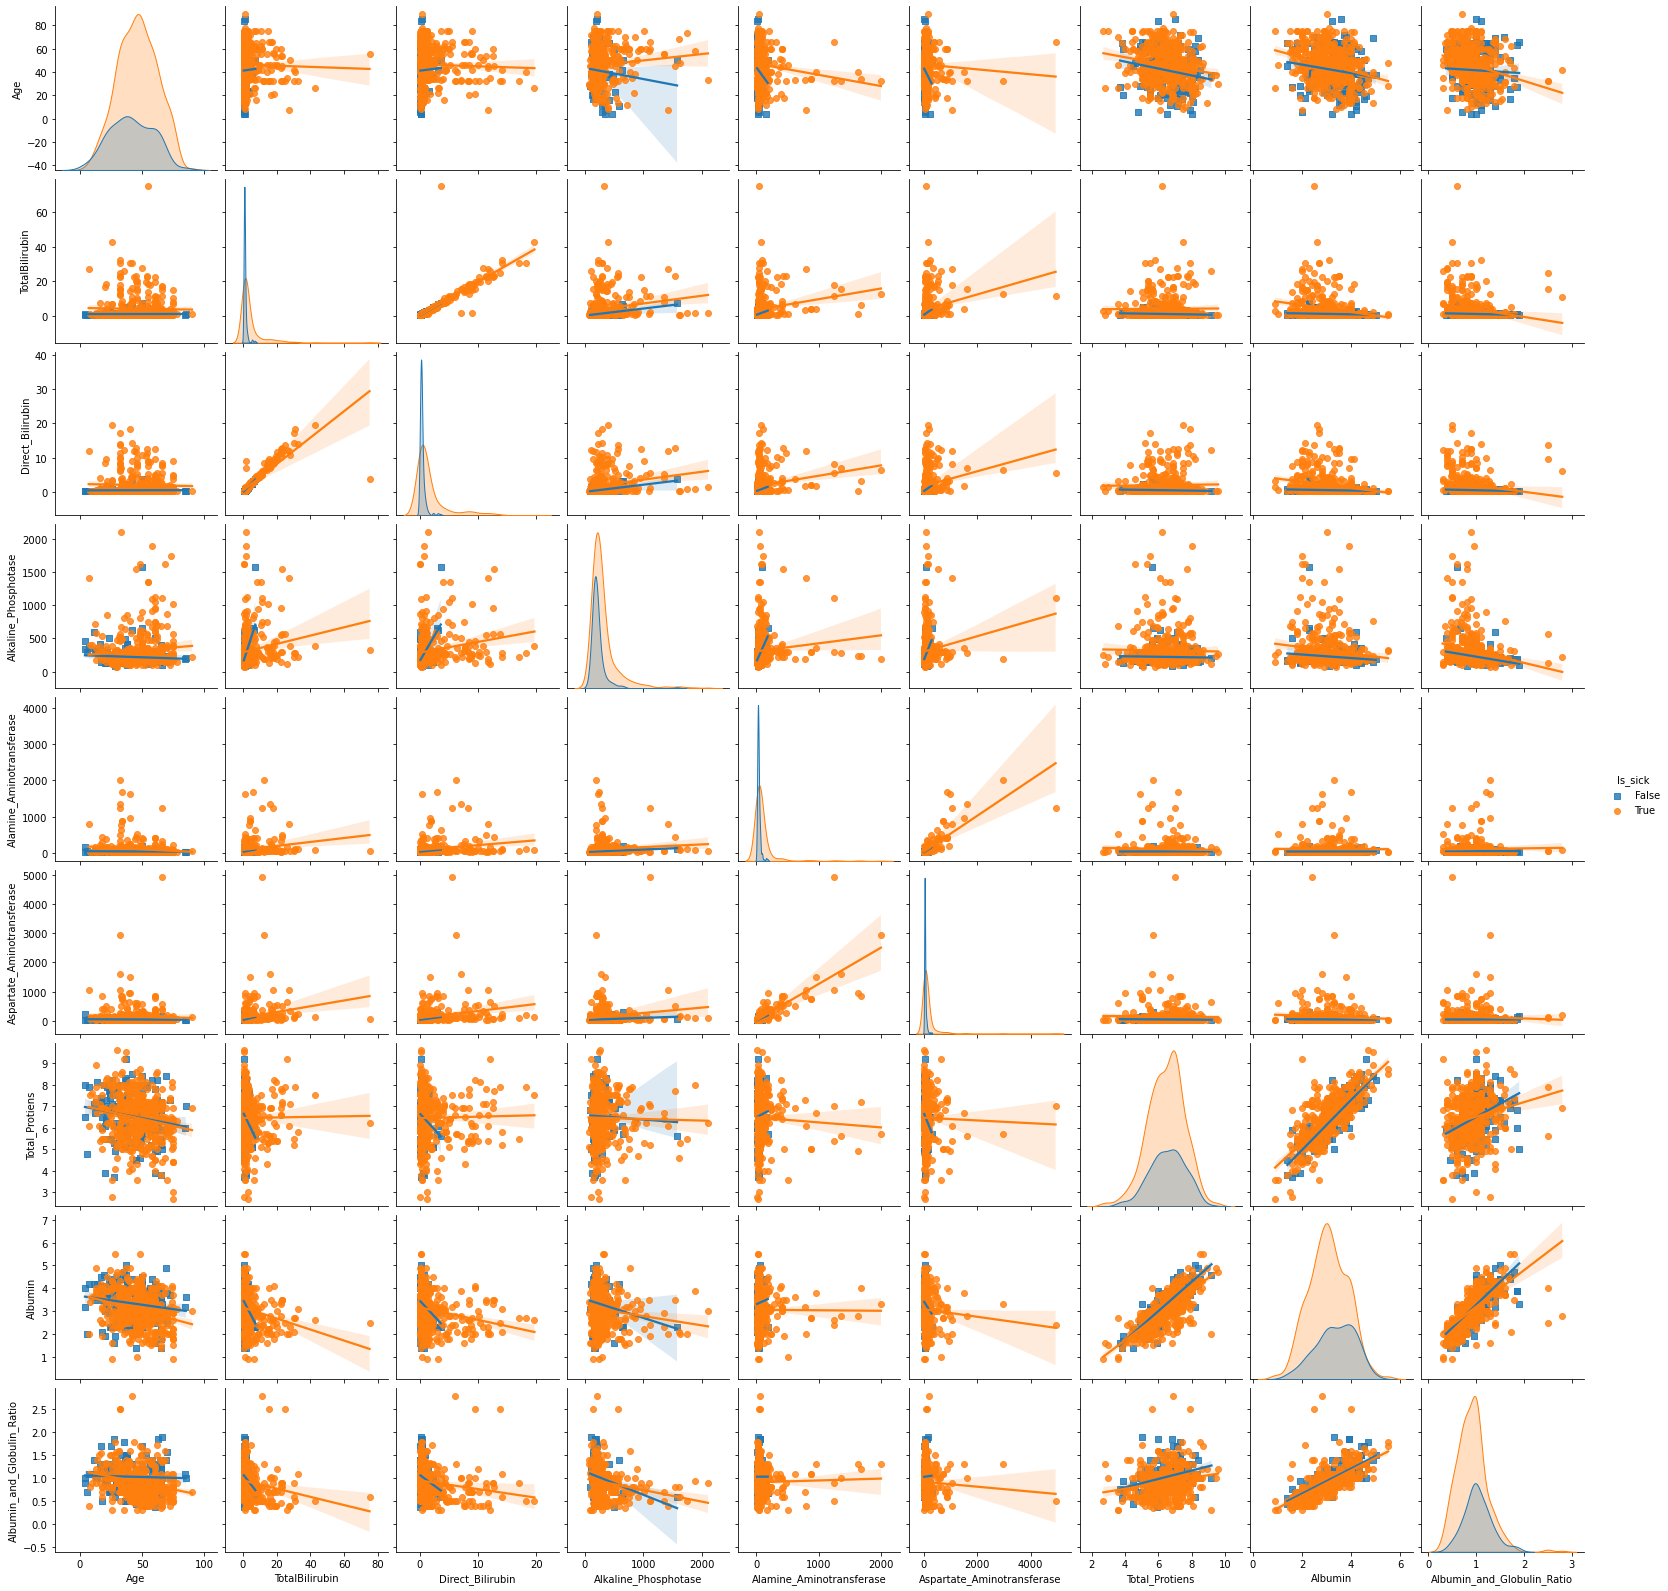

In [17]:
category = 'Is_sick'
cols_to_plot = ['Age', 'TotalBilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', \
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',\
               'Albumin_and_Globulin_Ratio', category]
df_to_plot = df[cols_to_plot]

sns.pairplot(df_to_plot, hue=category, markers = ['s', 'o'], kind = 'reg')

__Оценка коэффициентов корреляции__

1. Мужчины имеющие заболевание печени

Замечены следующие корреляции между параметрами:
* TotalBilirubin и Direct_Bilirubin (0.84)
* Alamine_Aminotransferase и Aspartate_Aminotransferase (0.78)
* Total_Protiens и Albumin (0.72)
* Albumin и Albumin_and_Globulin_Ratio (0.64)

2. Мужчины здоровые

Замечены следующие корреляции между параметрами:
* TotalBilirubin и Direct_Bilirubin (0.99)
* Alamine_Aminotransferase и Aspartate_Aminotransferase (0.71)
* Total_Protiens и Albumin (0.85)
* Albumin и Albumin_and_Globulin_Ratio (0.72)

Сравнительные выводы

У здоровых мужчин более сильная связь между признаками: TotalBilirubin и Direct_Bilirubin; Direct_Bilirubin и Alkaline_Phosphotase; Alkaline_Phosphotase и Aspartate_Aminotransferase.

Помимо того, что наиболее значимые коэффициенты корреляции как у здоровых мужчин, так и у мужчин с заболеванием печени, одинаковые, можно заметить и кое-что другое. У здоровых мужчин корреляционные коэффициенты следующих признаков значительно выше, чем у имеющих заболевание.

У мужчин имеющих заболевание печени параметр Alkaline_Phosphotase имеет больее сильную связь, чем у здоровых.

<AxesSubplot:title={'center':'Male_not_sick'}>

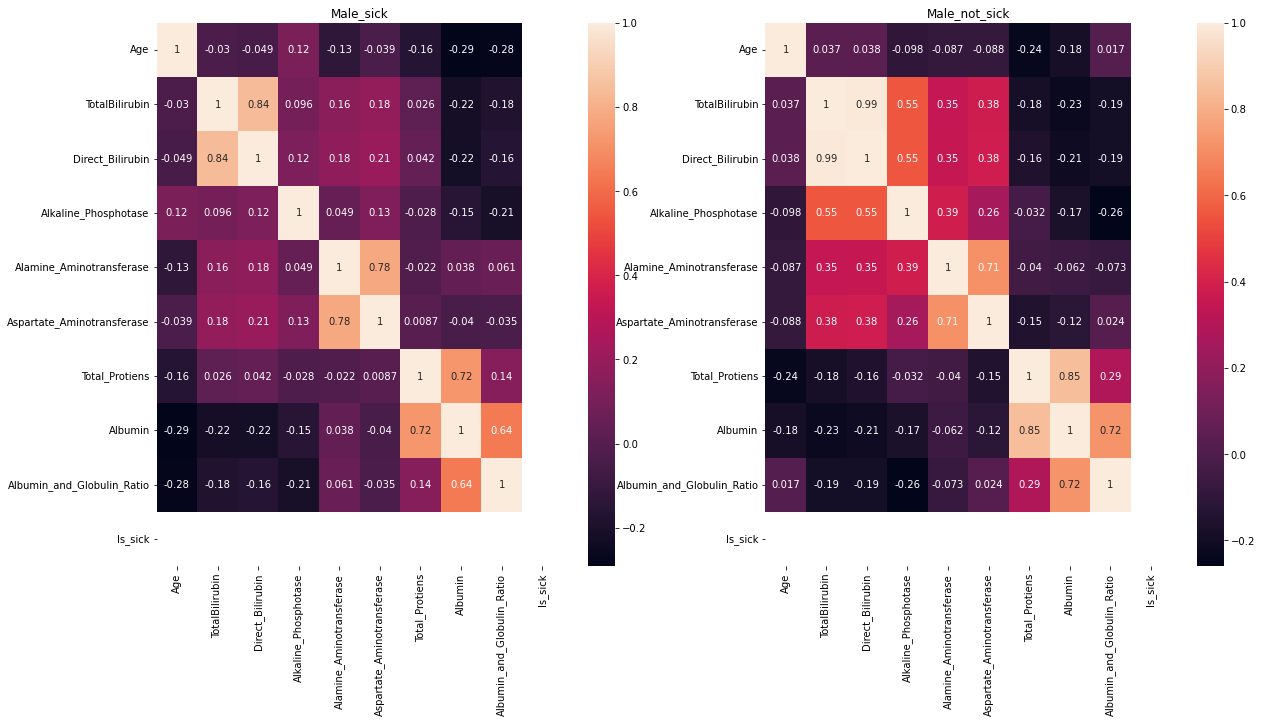

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax1, ax2 = ax

ax1.set_title('Male_sick')
ax2.set_title('Male_not_sick')

df_male = df[df['Gender'] == 'Male']
df_1 = df_male[df_male['Is_sick'] == True].corr()
df_2 = df_male[df_male['Is_sick'] == False].corr()

sns.heatmap(df_1, annot=True, ax=ax1)
sns.heatmap(df_2, annot=True, ax=ax2)

1. Женщины имеющие заболевание печени

Замечены следующие корреляции между параметрами:
* TotalBilirubin и Direct_Bilirubin (0.99)
* Alamine_Aminotransferase и Aspartate_Aminotransferase (0.95)
* Total_Protiens и Albumin (0.87)
* Albumin и Albumin_and_Globulin_Ratio (0.77)

2. Женщины здоровые

Замечены следующие корреляции между параметрами:
* TotalBilirubin и Direct_Bilirubin (0.97)
* Total_Protiens и Albumin (0.89)
* Albumin и Albumin_and_Globulin_Ratio (0.79)

Сравнительные выводы

У здоровых женщин более сильная связь между признаками: TotalBilirubin и Alkaline_Phosphotase. Однако корреляция между признаками Alamine_Aminotransferase и Aspartate_Aminotransferase у больных куда ниже, чем у здоровых.

<AxesSubplot:title={'center':'Female_not_sick'}>

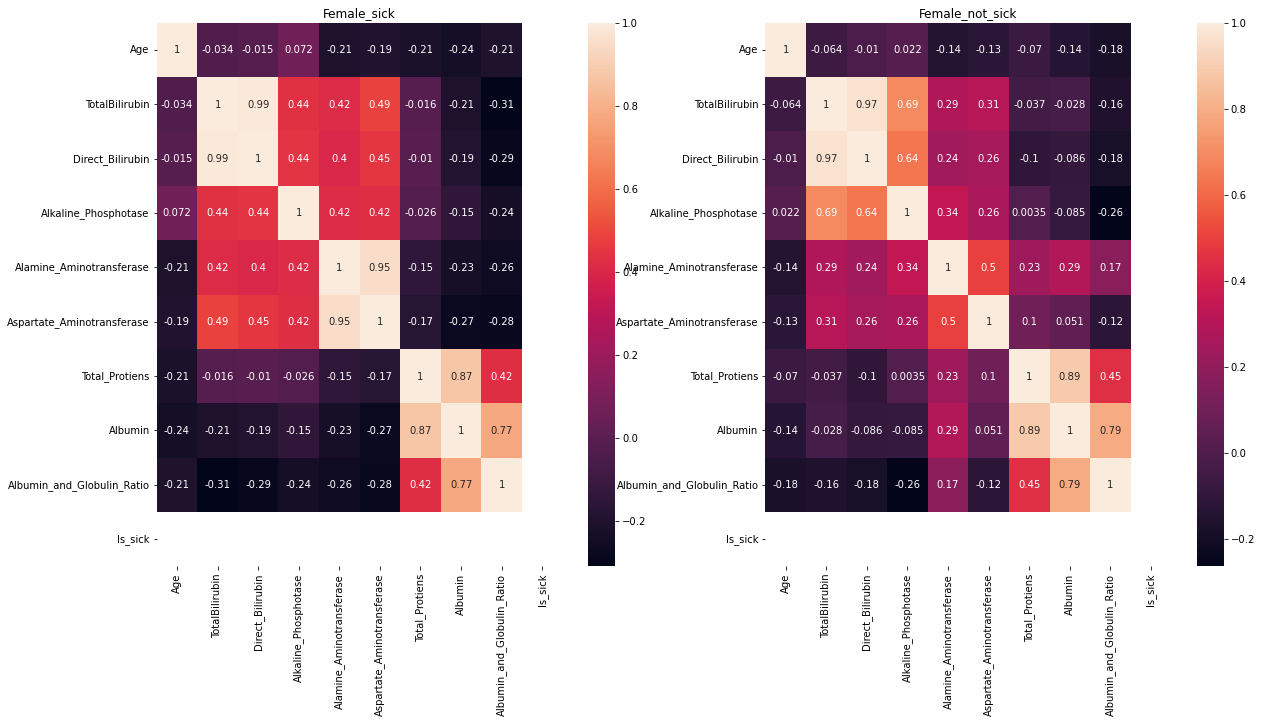

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax1, ax2 = ax

ax1.set_title('Female_sick')
ax2.set_title('Female_not_sick')

df_female = df[df['Gender'] == 'Female']
df_1 = df_female[df_female['Is_sick'] == True].corr()
df_2 = df_female[df_female['Is_sick'] == False].corr()

sns.heatmap(df_1, annot=True, ax=ax1)
sns.heatmap(df_2, annot=True, ax=ax2)

**Вывод**

Основываясь на полученных данных, можно сказать, что следующие анализы не влияют на диагностирование заболеваний печени, так как они одинаково коррелирует со всеми выделеными группам: TotalBilirubin и Direct_Bilirubin; Albumin и Albumin_and_Globulin_Ratio. Данные корреляции являются несодержательными, так как параметры в парах непосредственно зависят друг от друга.

Однако было замечено, что у здоровых как мужчин, так и женщин больее ярко свои связи проявляет признак Alkaline_Phosphotase.